# North Atlantic Oscillation

**Source :** <http://ajdawson.github.io/eofs/examples/nao_iris.html>

In [17]:
import warnings

import iris
import iris.plot as iplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from eofs.iris import Eof
from eofs.examples import example_data_path

In [18]:
filename = example_data_path('hgt_djf.nc')
z_djf = iris.load_cube(filename)

In [19]:
with warnings.catch_warnings():
    # Iris emits a warning due to the non-contiguous time dimension.
    warnings.simplefilter('ignore', UserWarning)
    z_djf_mean = z_djf.collapsed('time', iris.analysis.MEAN)
z_djf = z_djf - z_djf_mean

In [20]:
solver = Eof(z_djf, weights='coslat')

In [21]:
eof1 = solver.eofsAsCovariance(neofs=1)

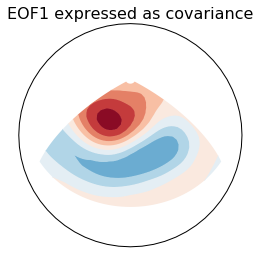

In [22]:
clevs = np.linspace(-75, 75, 11)
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
ax = plt.axes(projection=proj)
# ax.coastlines()
ax.set_global()
iplt.contourf(eof1[0, 0], levels=clevs, cmap=plt.cm.RdBu_r)
ax.set_title('EOF1 expressed as covariance', fontsize=16)
plt.show()

# El Niño

**Source :** <http://ajdawson.github.io/eofs/examples/elnino_iris.html>

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import iris
import iris.plot as iplt
import matplotlib.pyplot as plt
import numpy as np

from eofs.iris import Eof
from eofs.examples import example_data_path

In [4]:
iris.FUTURE.netcdf_promote = True

In [5]:
filename = example_data_path('sst_ndjfm_anom.nc')
sst = iris.load_cube(filename)

In [6]:
solver = Eof(sst, weights='coslat')

In [8]:
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)

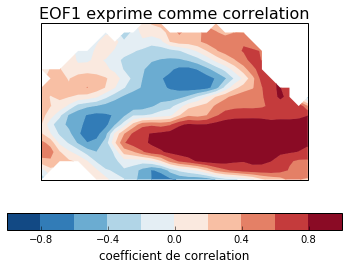

In [9]:
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = iplt.contourf(eof1[0], clevs, cmap=plt.cm.RdBu_r)
# ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('coefficient de correlation', fontsize=12)
ax.set_title('EOF1 exprime comme correlation', fontsize=16)

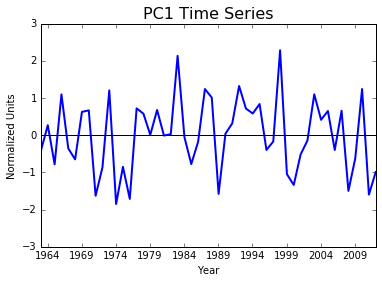

In [10]:
plt.figure()
iplt.plot(pc1[:, 0], color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)
plt.show()